In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Análisis de diferencias en log-salarios por género y raza</h1>
<p style="font-size:20px">


La Encuesta de Población Actual (CPS) es una encuesta mensual de alrededor de 57.000 hogares estadounidenses realizada por la Oficina del Censo de Estadísticas Laborales. La CPS es la principal fuente de información sobre las características de la fuerza laboral de la población estadounidense. La encuesta cubre empleo, ingresos, nivel educativo, pobreza, cobertura de seguro médico, experiencia laboral, votación y registro, uso de computadoras, condición de veterano y otras variables. Los detalles se pueden encontrar en www.census.gov/cps. De la encuesta de marzo de 2009, trabajaremos solo con 50.742 individuos que estaban empleados a tiempo completo
(definidos como aquellos que haían trabajado al menos 36 horas por semana durante al menos 48 semanas el año pasado). Estamos interesados en estudiar el siguiente grupo de variables:

- logwage representa el logaritmo del salario por horario,
- gender es una variable categórica con valores “male” y “female”,
- race es una variable categórica con valores “white”, “Black” y “other”.
- education: años de educación formal

In [2]:
##Cargamos el dataset
url=r'C:\Users\Camil\Documents\ESPOL\ECOP2037_CE\hmw1\cps09mar.csv'
cps=pd.read_csv(url)

In [3]:
##construimos variable logaritmo de salario
cps['log_wage']=np.log(cps['earnings']/cps['week']/cps['hours'])

##contruimos variable gender
cps['gender']= np.where(cps['female'] == 1, 'Women', 'Men')

##contruimos variable race_group
cps['race_group'] = cps['race'].map({1: 'White', 2: 'Black'}).fillna('Other')



1. Calcule la media del log-salario (logwage) para cada una de las seis combinaciones posibles
de gender y race. Presente sus resultados en una tabla con el siguiente formato, e incluya
una columna adicional con la diferencia entre hombres y mujeres (men - women) dentro de
cada grupo racial:

In [4]:
tabla = cps.groupby(['race_group', 'gender'])['log_wage'].mean().reset_index().round(2)
pivot = tabla.pivot(index='race_group', columns='gender', values='log_wage')
pivot['Difference'] = (pivot['Men'] - pivot['Women']).round(2)

pivot

gender,Men,Women,Difference
race_group,,,
Black,2.86,2.73,0.13
Other,3.03,2.86,0.17
White,3.07,2.82,0.25


Para todos los grupos raciales, los hombres ganan más que las mujeres siendo esta brecha más grande entre los de raza blanca. Entre los hombres, los que tienen un log(salario) promedio más alto son los blancos y los que ganan menos son los de raza negra por una amplia diferencia. En tanto a las mujeres, las del log(salario) más alto son aquellas que no son de raza negra ni blanca, seguidas por las mujeres blancas y, por una gran diferencia, las de raza negra, las cuales son el grupo observado con menor log(salario) promedio.

2. Grafique las funciones de densidad empírica del logwage para los seis grupos combinando
género y raza. Utilice líneas diferenciadas por color o estilo para cada grupo y agregue una
leyenda que identifique claramente cada uno.

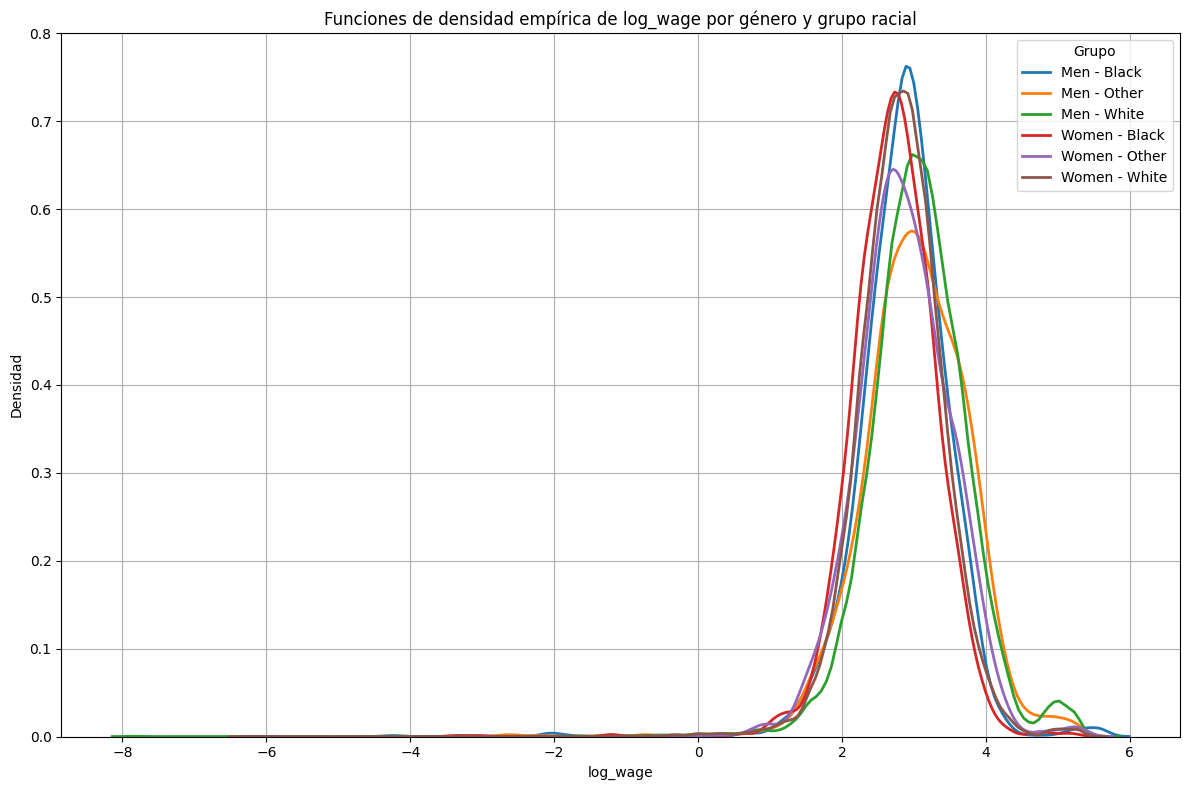

In [5]:
cps['group'] = cps['gender'] + ' - ' + cps['race_group']

plt.figure(figsize=(12, 8))

for name, subset in cps.groupby('group'):
    sns.kdeplot(
        data=subset,
        x='log_wage',
        label=name,
        linewidth=2
    )

plt.title('Funciones de densidad empírica de log_wage por género y grupo racial')
plt.xlabel('log_wage')
plt.ylabel('Densidad')
plt.legend(title='Grupo', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


3. Comente brevemente las diferencias observadas en las funciones de densidad. ¿Qué grupo
tiene mayor tendencia central? ¿Hay diferencias claras en la dispersión o forma de las distribuciones?

Como se puede observar en la gráfica, el grupo con mayor tendencia central son los hombres de raza negra (linea azul). Además, en el grupo de hombres blancos (linea verde) se obsereva una acumulación a la derecha, lo que quiere decir que hay más personas de este grupo ganando salarios más altos que cualquier otro grupo. Una dinamica similar pero en menor proporción se observa para los hombres de otras razas (línea naranja). 
En cambio, para las mujeres, ningun grupo racial muestra acumulaciones en salarios altos. Las mujeres blancas y de otras razas muestran una distribución muy similar siendo los salarios de las mujeres blancas (linea café) apenas más altos.

4. Explique por qué se cumple la siguiente identidad utilizando el teorema de la esperanza iterada:

$$
\begin{aligned}
E[\log(\text{wage}) \mid \text{gender} = \text{man}] =\ & 
E[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = \text{white}] \cdot P[\text{race} = \text{white} \mid \text{gender} = \text{man}] \\
&+ E[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = \text{Black}] \cdot P[\text{race} = \text{Black} \mid \text{gender} = \text{man}] \\
&+ E[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = \text{other}] \cdot P[\text{race} = \text{other} \mid \text{gender} = \text{man}]
\end{aligned}
$$


El teorema de la esperanza iterada dice que: 
$$
\begin{aligned}
\mathbb{E}[\log(\text{wage}) \mid \text{gender} = \text{man}] &= 
\mathbb{E}[\mathbb{E}[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race}] \mid \text{gender} = \text{man}] \\
&= \sum_{y} \mathbb{E}[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = y] \cdot P(\text{race} = y \mid \text{gender} = \text{man}) \\
&= \mathbb{E}[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = \text{white}] \cdot P(\text{race} = \text{white} \mid \text{gender} = \text{man}) \\
&\quad + \mathbb{E}[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = \text{Black}] \cdot P(\text{race} = \text{Black} \mid \text{gender} = \text{man}) \\
&\quad + \mathbb{E}[\log(\text{wage}) \mid \text{gender} = \text{man},\ \text{race} = \text{other}] \cdot P(\text{race} = \text{other} \mid \text{gender} = \text{man})
\end{aligned}
$$


5. Calcule empíricamente cada uno de los términos de la derecha utilizando su base de datos.
Verifique si su suma coincide con el promedio observado de log(wage) para los hombres.

In [6]:
men = cps[cps['gender'] == 'Men']

#E[log_wage | gender = man]
mean_men = men['log_wage'].mean()


#E[log_wage | gender = man, race = x] 
mean_race = men.groupby('race_group')['log_wage'].mean()

#P[race = x | gender = man]
pr_race = men['race_group'].value_counts(normalize=True)

#RESULTADO
weighted_sum = sum(
    mean_race[race] * pr_race[race]
    for race in ['White', 'Black', 'Other']
)

print(f"E[log(wage) | gender = man]: {mean_men:.4f}")
print(f"E[log(wage) | gender = man, race = white] · P[race = white | gender = man] + E[log(wage) | gender = man, race = Black] · P[race = Black | gender = man] + E[log(wage) | gender = man, race = other] · P[race = other | gender = man]: {weighted_sum:.4f}")
print(f"COINCIDEN")

E[log(wage) | gender = man]: 3.0459
E[log(wage) | gender = man, race = white] · P[race = white | gender = man] + E[log(wage) | gender = man, race = Black] · P[race = Black | gender = man] + E[log(wage) | gender = man, race = other] · P[race = other | gender = man]: 3.0459
COINCIDEN


6. Restrinja la muestra a individuos blancos (race == “white”, y “Black”). Para estos subgrupos:
- Calcule la media condicional de logwage para cada año de educación, separadamente para hombres y mujeres, por raza.
- Presente los resultados en una tabla que muestre: años de educación, media logwage para hombres blancos y negro, y media logwage para mujeres blancas y negras.

In [7]:
cps_subset = cps[cps['race_group'].isin(['White', 'Black'])]    ##restrinjo
grouped = cps_subset.groupby(['education', 'gender', 'race_group'])['log_wage'].mean().reset_index().round(2)  ##saco media por grupo

grouped['group'] = grouped['gender'] + '_' + grouped['race_group']  ##clasifico
tabla = grouped.pivot(index='education', columns='group', values='log_wage')   #creo tabla por grupos

tabla

group,Men_Black,Men_White,Women_Black,Women_White
education,,,,
0,2.47,2.37,2.46,2.02
4,2.07,2.38,2.14,2.14
6,2.33,2.38,2.08,2.19
8,2.45,2.52,1.97,2.21
9,2.47,2.44,2.13,2.13
10,2.00,2.58,2.14,2.29
11,2.47,2.58,2.13,2.30
12,2.70,2.84,2.51,2.57
13,2.83,2.97,2.65,2.71


7. Grafique la media condicional de logwage como función de los años de educación, separadamente para hombres y mujeres, por tipo de raza. Asegúrese de:
Usar líneas diferenciadas por color o estilo para cada grupo.
Incluir una leyenda, título y etiquetas de los ejes.

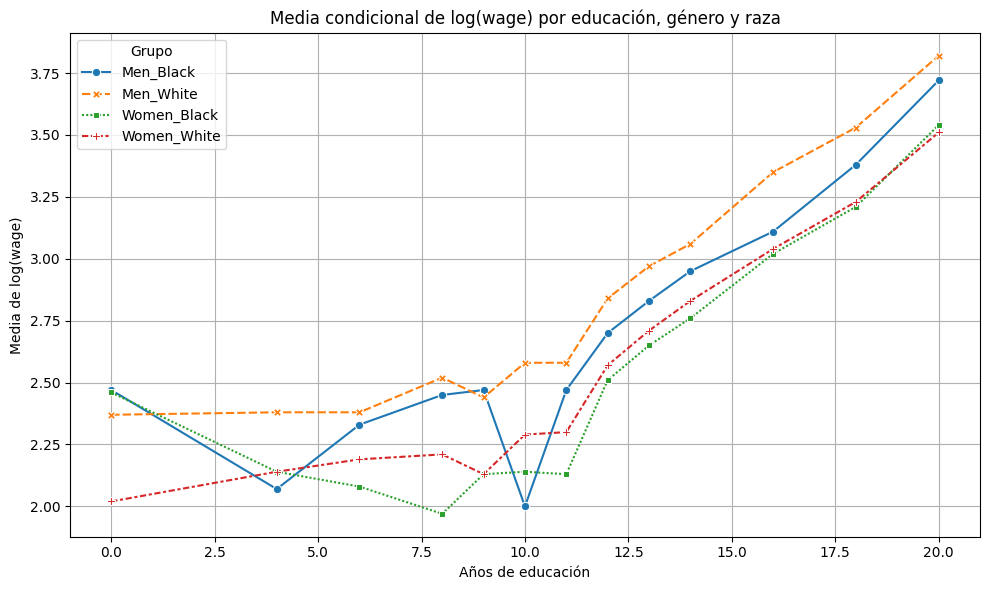

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='education', y='log_wage', hue='group', style='group', markers=True)

plt.title('Media condicional de log(wage) por educación, género y raza')
plt.xlabel('Años de educación')
plt.ylabel('Media de log(wage)')
plt.legend(title='Grupo')
plt.grid(True)
plt.tight_layout()
plt.show()


8. Comente brevemente los siguientes puntos observados en el gráfico:
¿La relación entre educación y log-salario parece lineal?
A simple vista se podria decir que no. El crecimiento en log(wage) es más lento a niveles bajos de educación y se acelera después de cierto punto (10-12 años de educación). Incluso, para ciertos grupos, hasta cierto punto la relación es negativa y luego cambia a positiva.

¿Se aprecia un cambio en la pendiente para niveles de educación mayores o menores a 9 años?
Si, a partir de los 9 años de educación, la pendiente es mucho más pronunciada. Lo que quiere decir que cada aumento de años de educación representa cada vez más aumento en el log(wage). En el caso de las mujeres negras, la pendiente pasa de ser negativa a positiva al rededor de los 9 años de educación.


¿Cómo se comporta la brecha entre hombres y mujeres a lo largo del espectro educativo? ¿y por raza?
La brecha entre hombres y mujeres se mantiene relativamente constante en la mayoría de los niveles educativos, con los hombres ganando sistemáticamente más que las mujeres. Sin embargo, al observar la brecha de género solo en las personas de raza negra, en bajos años de educación la brecha es pequeña y aumenta a medida que se incrementan los años de educación. Los blancos (tanto hombres como mujeres) tienen consistentemente mayores salarios que sus contrapartes negras.


¿Qué implica una brecha aproximadamente constante en términos del salario en niveles (no log)?
Una brecha constante en log(wage) implica que la diferencia proporcional o relativa en salario se mantiene igual entre los grupos. En otras palabras, si los hombres ganan un 20% más que las mujeres en todos los niveles educativos, esa proporción se traduce en una brecha de log-salario constante. Sin embargo, en términos del salario en niveles, esa brecha aumenta a medida que los salarios suben, ya que el mismo porcentaje representa un monto mayor en valores más altos.

